In [1]:
import pandas as pd

## 1) 데이터 불러오기

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- survived : 생존 여부 (1: 생존 , 0: 사망)
- Pclass: 티켓 class (1:1등석 , 2:2등석, 3:3등석)
- SibSp : 함께 탑승한 형제 또는 배우자 수
- parch: 함께 탑승한 부모 또는 자녀의 수
- ticket: 티켓 수
- Cabin: 선실번호
- Embarked: 어느 선착장에서 탔는지 (C:cherbourg, Q:Queenstown, S:Southampton

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### test: survived 컬럼 없음 -> 맞춰야 하므로

In [6]:
print(train.shape,test.shape)

(891, 12) (418, 11)


### 정보가 없는 경우 있어서 약간의 조정이 필요

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin na값들이 보임

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# 2) 시각화

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


In [12]:
def bar_chart(features):
    Survived=train[train['Survived']==1][features].value_counts()
    dead=train[train['Survived']==0][features].value_counts()
    df=pd.DataFrame([Survived,dead])
    df.index=["Survived","dead"]
    df.plot(kind='bar',stacked=True, figsize=(10,5))

- pclass : 낮은 등급일수록 사망할 경우가 많음

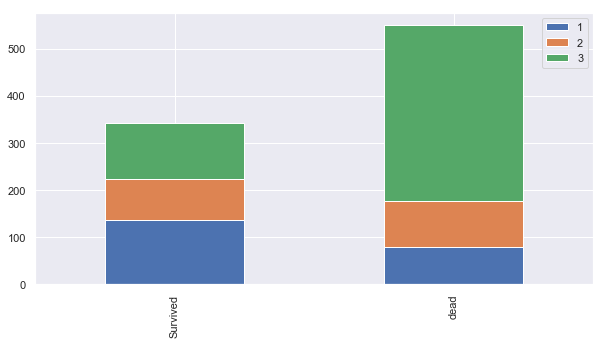

In [13]:
bar_chart("Pclass")

- Sex: 남성일 경우 사망할 경우 많음

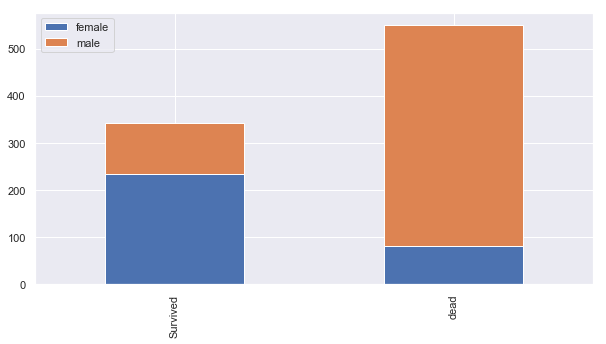

In [14]:
bar_chart('Sex')

- 'Embarked': S일수록 사망

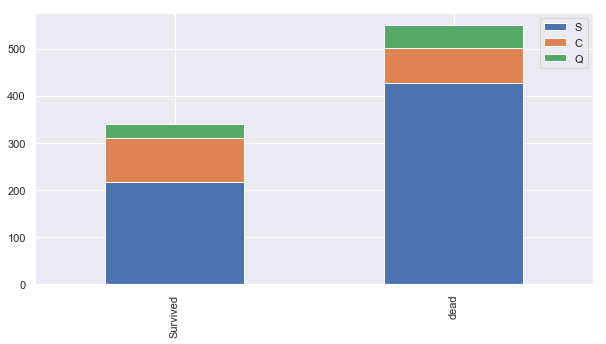

In [15]:
bar_chart("Embarked")

- SibSp: 동승한 형제나 배우자가 없을수록 사망 많음

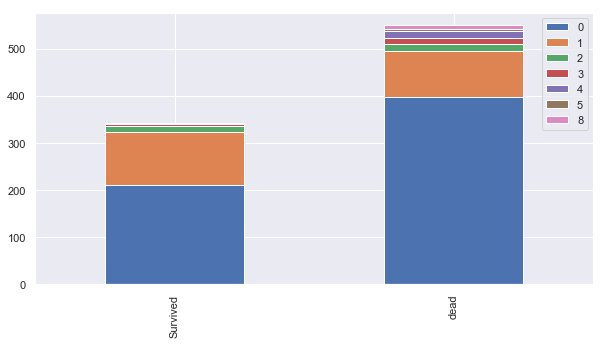

In [16]:
bar_chart("SibSp")

- Parch: 부모님이나 자녀가 동승할 경우 살 확률이 높음

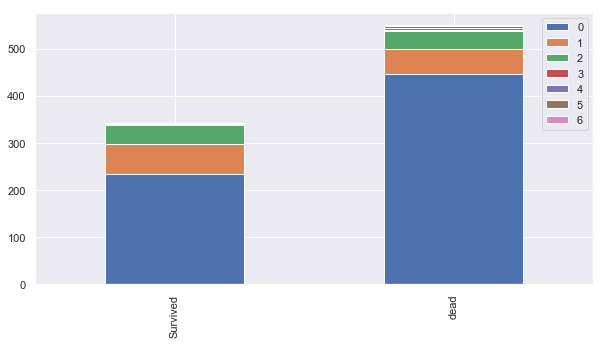

In [17]:
bar_chart("Parch")

## 3) feature engineering

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Name : 타이틀을 가져오기

In [19]:
train_test_data=[train,test]
for data in train_test_data:
    data['title']=data["Name"].str.extract(' ([A-Za-z]+)\.',expand= False)
    #공백이 포함후, 끝에 특수포함되고 알파벳(대문자 소문자)가 1개이상을 포함하는 하나의 문자(단어)

In [20]:
train['title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Jonkheer      1
Countess      1
Lady          1
Don           1
Ms            1
Mme           1
Sir           1
Capt          1
Name: title, dtype: int64

In [21]:
test['title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: title, dtype: int64

In [22]:
mapping={'Mr':0,'Miss':1,'Mrs': 2,'Master': 3, 'Dr': 3, 'Rev': 3, 'Col':3,
         'Major':3, 'Mlle':3,'Sir':3 ,'Don':3,'Jonkheer':3,'Capt':3,'Ms':3,'Countess':3,'Mme':3, 'Lady':3,'Dona':1 }
for data in train_test_data:
    data['title']=data['title'].map(mapping)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


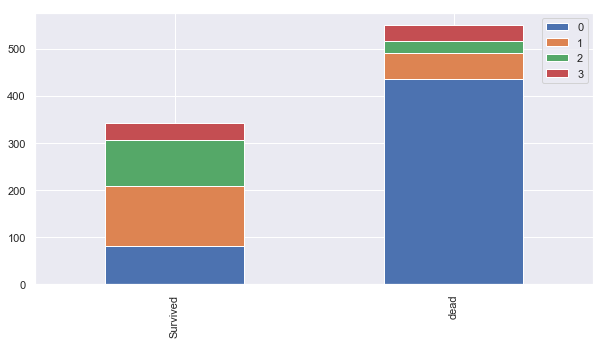

In [24]:
bar_chart('title')

Mr(남자)=0, Mrs, Mis(여자)=1  

여자가 많이 살았다.

- sex 

In [25]:
sex_map={"male":0,"female":1}
for data in train_test_data:
    data['Sex']=data['Sex'].map(sex_map)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0


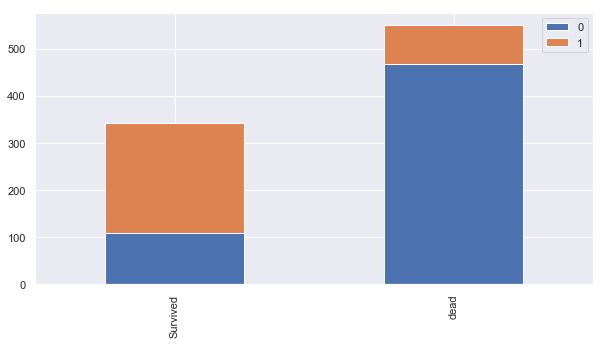

In [27]:
bar_chart('Sex')

남자가 많이 사망한 것을 알 수 있음

- Age 

In [28]:
train["Age"][:100]

0     22.00
1     38.00
2     26.00
3     35.00
4     35.00
5       NaN
6     54.00
7      2.00
8     27.00
9     14.00
10     4.00
11    58.00
12    20.00
13    39.00
14    14.00
15    55.00
16     2.00
17      NaN
18    31.00
19      NaN
20    35.00
21    34.00
22    15.00
23    28.00
24     8.00
25    38.00
26      NaN
27    19.00
28      NaN
29      NaN
      ...  
70    32.00
71    16.00
72    21.00
73    26.00
74    32.00
75    25.00
76      NaN
77      NaN
78     0.83
79    30.00
80    22.00
81    29.00
82      NaN
83    28.00
84    17.00
85    33.00
86    16.00
87      NaN
88    23.00
89    24.00
90    29.00
91    20.00
92    46.00
93    26.00
94    59.00
95      NaN
96    71.00
97    23.00
98    34.00
99    34.00
Name: Age, Length: 100, dtype: float64

In [29]:
#nan을 다른 수로 채우기
train["Age"].fillna(train.groupby("title")["Age"].transform("mean"),inplace=True) 
#transform() 인자: 스칼라 값이나 같은 크기를 가지는 배열을 반환하는 함수
test["Age"].fillna(test.groupby("title")["Age"].transform("mean"),inplace=True) 

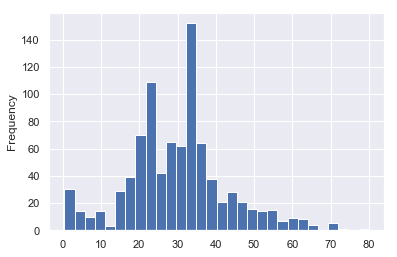

In [30]:
train["Age"].plot.hist(bins=30)

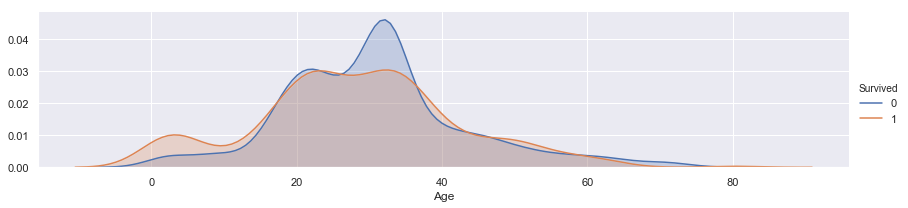

In [31]:
age_survived=sns.FacetGrid(train, hue='Survived',aspect=4)
age_survived.map(sns.kdeplot,'Age',shade=True)
age_survived.add_legend()
plt.show()

(20, 40)

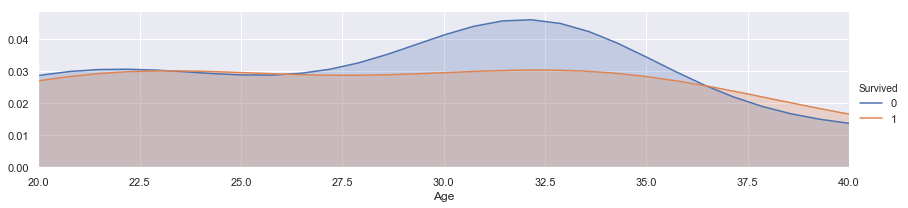

In [32]:
age_survived=sns.FacetGrid(train, hue='Survived',aspect=4)
age_survived.map(sns.kdeplot,'Age',shade=True)
age_survived.add_legend()
plt.xlim(20,40)

##### 나누는 기준
- 어린이(0~13):0
- 학생(14~20): 1
- 청년(21~35):2
- 어른(36~60):3
- 노인(61~):4


In [33]:
train_test_data=[train,test]
for data in train_test_data:
    data.loc[data['Age']<=13,'Age']=0,
    data.loc[(13<data['Age'])& (data['Age']<=20),'Age']=1,
    data.loc[(20<data['Age'])&(data['Age']<=35),'Age']=2,
    data.loc[(35<data['Age'])&(data['Age']<=60),'Age']=3,
    data.loc[data['Age']>60,'Age']=4
   

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,0


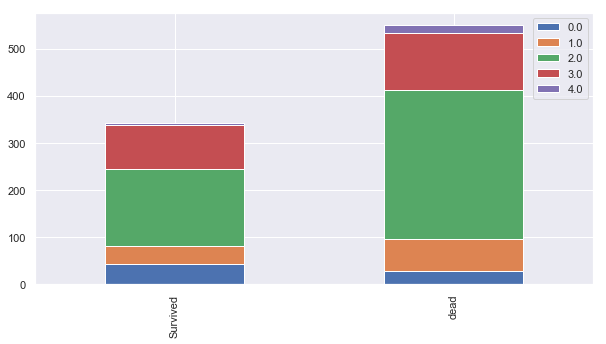

In [35]:
bar_chart('Age')

21~35세 청년의 사망이 큼. 61세이상 노인의 대부분도 사망

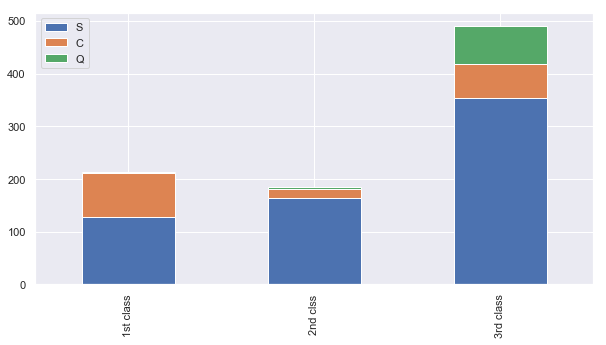

In [36]:
pclass1= train[train['Pclass']==1]['Embarked'].value_counts()
pclass2= train[train['Pclass']==2]['Embarked'].value_counts()
pclass3= train[train['Pclass']==3]['Embarked'].value_counts()
df=pd.DataFrame([pclass1,pclass2,pclass3])
df.index=["1st class",'2nd clss','3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

3rd의 비중이 s가 큼

In [37]:
for data in train_test_data:
    data["Embarked"]=data['Embarked'].fillna('S')

In [38]:
train[["Pclass","Embarked"]].groupby("Embarked").count()

,Pclass
Embarked,
C,168
Q,77
S,646


In [39]:
embarked_map={"C":0,"Q":1,"S":2}
for data in train_test_data:
    data["Embarked"]=data["Embarked"].map(embarked_map)

In [40]:
train["Embarked"][:10]

0    2
1    0
2    2
3    2
4    2
5    1
6    2
7    2
8    2
9    0
Name: Embarked, dtype: int64

- Fare

In [41]:
#nan을 다른 수로 채우기
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("mean"),inplace=True) 
#transform() 인자: 스칼라 값이나 같은 크기를 가지는 배열을 반환하는 함수
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("mean"),inplace=True) 

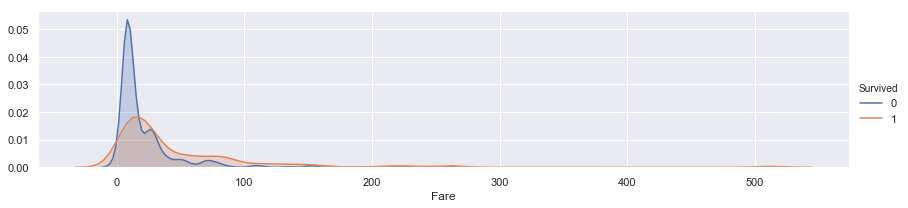

In [42]:
fare_survived=sns.FacetGrid(train, hue='Survived',aspect=4)
fare_survived.map(sns.kdeplot,'Fare',shade=True)
fare_survived.add_legend()
plt.show()

In [43]:
for data in train_test_data:
    data.loc[data['Fare']<=15,'Fare']=0,
    data.loc[(15<data['Fare'])& (data['Fare']<=30),'Fare']=1,
    data.loc[(30<data['Fare'])&(data['Fare']<=100),'Fare']=2,
    data.loc[data['Fare']>100,'Fare']=3

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,0.0,NaN,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,2.0,C85,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,0.0,NaN,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,2.0,C123,2,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,NaN,2,0


- cabin

In [45]:
train.Cabin.value_counts()

G6                 4
B96 B98            4
C23 C25 C27        4
F2                 3
D                  3
E101               3
F33                3
C22 C26            3
B35                2
B5                 2
D36                2
B77                2
E24                2
C68                2
F4                 2
C93                2
C124               2
C2                 2
D35                2
B57 B59 B63 B66    2
B49                2
B18                2
E121               2
E33                2
B58 B60            2
C65                2
E67                2
E25                2
B28                2
B51 B53 B55        2
                  ..
C82                1
D7                 1
D47                1
E36                1
A19                1
B80                1
E68                1
B38                1
E17                1
A5                 1
E12                1
C118               1
B30                1
C103               1
A7                 1
D28                1
D45          

In [46]:
for data in train_test_data:
    data['Cabin']=data['Cabin'].str[:1]

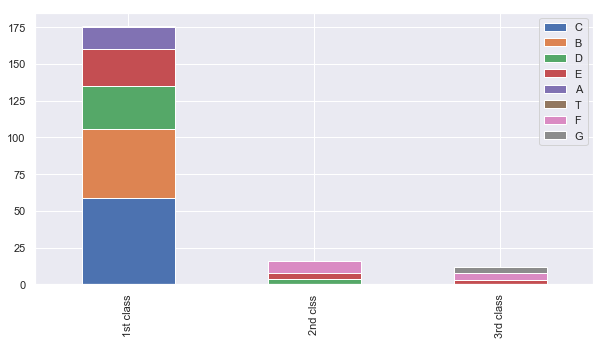

In [47]:
pclass1= train[train['Pclass']==1]['Cabin'].value_counts()
pclass2= train[train['Pclass']==2]['Cabin'].value_counts()
pclass3= train[train['Pclass']==3]['Cabin'].value_counts()
df=pd.DataFrame([pclass1,pclass2,pclass3])
df.index=["1st class",'2nd clss','3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

- a,b,c,d,e => 1등급
- d,e,f=>2등급
- e,f,g=> 3등급

In [48]:
cabin_map={"A":0,"B":0.3,"C":0.6,"D":0.8,"E":1,"F":1.2,"G":1.4,"T":1.6}
for data in train_test_data:
    data['Cabin']=data['Cabin'].map(cabin_map)

In [49]:
train['Cabin'].fillna(train.groupby("Pclass")["Cabin"].transform("mean"),inplace=True)
test['Cabin'].fillna(test.groupby("Pclass")["Cabin"].transform("mean"),inplace=True)

- family

In [50]:
train["Family"]=train["SibSp"]+train["Parch"]+1
test["Family"]=test["SibSp"]+test["Parch"]+1

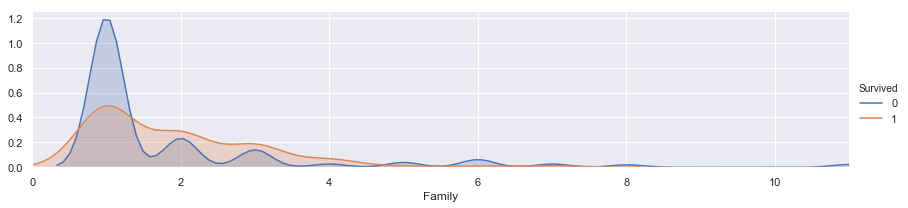

In [51]:
family_survived=sns.FacetGrid(train, hue='Survived',aspect=4)
family_survived.map(sns.kdeplot,'Family',shade=True)
family_survived.set(xlim=(0,train['Family'].max()))
family_survived.add_legend()
plt.show()

In [52]:
train['Family'].isnull().sum()

0

In [53]:
family_map={1:0, 2:0.2, 3:0.6, 4:0.9, 5:1.2, 6:1.5, 7:1.8, 8:2.1, 9:2.4, 10:2.7, 11:3}
for data in train_test_data:
    data['Family']=data['Family'].map(family_map)

In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,0.0,1.216667,2,0,0.2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,2.0,0.600000,0,2,0.2
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,0.0,1.216667,2,1,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,2.0,0.600000,2,2,0.2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,1.216667,2,0,0.0


In [55]:
#na 확인
test[test["Family"].isnull()==True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Family


In [56]:
train=train.drop(["Name","Ticket","Parch","SibSp"],axis=1)
test=test.drop(["Name","Ticket","Parch","SibSp"],axis=1)

In [57]:
train_data=train.drop("Survived",axis=1)
target=train["Survived"]

## 4) 모델링

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import numpy as np

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
Fare           891 non-null float64
Cabin          891 non-null float64
Embarked       891 non-null int64
title          891 non-null int64
Family         891 non-null float64
dtypes: float64(4), int64(6)
memory usage: 69.7 KB


### Cross Validation (k-fold)

In [60]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold=KFold(n_splits=8,shuffle=True,random_state=0)

### knn
데이터를 분류를 할 때 k개의 이웃 중 거리가 가까운 이웃의 영향을 더 많이 받도록 weight 지정 가능

In [61]:
clf=KNeighborsClassifier(n_neighbors=12)
scoring="accuracy"
score=cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
#n_jobs는 사용할 코어의 갯수 입니다. -1이면 모든 코어를 사용
print(score)

[0.52678571 0.61607143 0.58035714 0.63963964 0.56756757 0.53153153
 0.58558559 0.51351351]


In [62]:
round(np.mean(score)*100,2)

57.01

### Decision Tree


In [63]:
clf=DecisionTreeClassifier()
score=cross_val_score(clf, train_data, target, cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.75       0.75892857 0.79464286 0.71171171 0.76576577 0.78378378
 0.72972973 0.74774775]


In [64]:
round(np.mean(score)*100,2)

75.53

In [65]:
clf=RandomForestClassifier(n_estimators=10)
scoring="accuracy"
score= cross_val_score(clf, train_data, target, cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.83928571 0.83928571 0.82142857 0.8018018  0.8018018  0.8018018
 0.72972973 0.81081081]


In [66]:
round(np.mean(score)*100,2)

80.57

### Naive Bayes

In [67]:
clf=GaussianNB()
scoring="accuracy"
score= cross_val_score(clf, train_data, target, cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.83035714 0.74107143 0.75892857 0.73873874 0.79279279 0.77477477
 0.79279279 0.84684685]


In [68]:
round(np.mean(score)*100,2)

78.45

In [69]:
clf=SVC()
scoring="accuracy"
score= cross_val_score(clf, train_data, target, cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[0.58035714 0.63392857 0.59821429 0.67567568 0.64864865 0.59459459
 0.6036036  0.63963964]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [70]:
round(np.mean(score)*100,2)

62.18

### linear model

In [71]:
clf=LogisticRegression(random_state=0).fit(train_data, target)
clf.score(train_data, target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8204264870931538

## 5) Testing

In [78]:
clf=LogisticRegression(random_state=0)
clf.fit(train_data, target)

test_data=test.drop("PassengerId",axis=1).copy()
prediction=clf.predict(test)

submit=pd.DataFrame({"passengerId":test["PassengerId"],"Survived":prediction})
submit.to_csv("submit.csv",index=False)
print(submit)

     passengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         1
20           912         0
21           913         1
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284         1
3

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [79]:
clf=RandomForestClassifier(n_estimators=10)
clf.fit(train_data, target)

test_data=test.drop("PassengerId",axis=1).copy()
prediction=clf.predict(test)

In [80]:
submit_forest=pd.DataFrame({"passengerId":test["PassengerId"],
                    "Survived":prediction})
submit_forest.to_csv("submit_forest.csv",index=False)
print(submit)

     passengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         1
20           912         0
21           913         1
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284         1
3

로지스틱이 더 잘나왔답니다~^^

처음 유튜브 보면서 약간의 조정을 시도 해봤는데

더 안좋게 나왔다는 사실 ㅎㅎ



참고. 유튜브_Minsuk Heo 허민석 "타이타닉 생존자 예측하기"